<a href="https://colab.research.google.com/github/mukul-mschauhan/Machine-Learning-Projects/blob/master/Introduction_to_NLP_Airline_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data we're providing on Kaggle is a slightly reformatted version of the original source. It includes both a CSV file and SQLite database. The code that does these transformations is available on GitHub

For example, it contains whether the sentiment of the tweets in this set was **positive, neutral, or negative** for six US airlines:

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_csv("/content/Tweets.csv")

airline.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)


In [ ]:
# Extract Airline Sentiment and text....

mydf = airline.loc[:, ['airline_sentiment', 'text']]
mydf.head(2)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...


In [ ]:
# NLP Libraries
import re # Regular Expression
import nltk # NLP Library and other one is called 'Spacy'

nltk.download("stopwords")
nltk.download("punkt")

from nltk.corpus import stopwords

stop_words = stopwords.words("english")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Removal of Stopwords...

mytext = '''@VirginAmerica plus you've added \
commercials to the experience... tacky.'''

words = mytext.split()

newtext = " ".join([word for word in words if word not in stop_words])

In [ ]:
# For Whole Data
def remove_stop(text):
  text = text.lower() # converts the text into lowercase
  words = text.split() # Split the Sentence into words
  return(" ".join([word for word in words if word not in stop_words]))

mydf["clean_text"]=  mydf.text.apply(remove_stop)

In [ ]:
# removal of noise in the data...
print(newtext)
#re.findall("[^A-Za-z\s]", newtext)

def clean_text(text):
  #text = re.findall("@\w+|[^A-Za-z\s]", text)
  text = re.sub("@\w+|[^A-Za-z\s]", " ", text)
  #text = re.sub("\s+", " ", text) # Additional Whitespace Characters
  return(text.strip())

print(clean_text(newtext))

@VirginAmerica plus added commercials experience... tacky.
plus added commercials experience    tacky


In [ ]:
# Create a function that will expose all the special characters in the data
def preview(text):
  text = re.findall("@\w+|[^A-Za-z0-9\s]", text)
  return(text)

mydf["noise"] =  mydf.clean_text.apply(preview)

noise = set(char for sublist in mydf.noise for char in sublist)
sorted_noise = sorted(list(noise))

print(sorted_noise)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '=', '?', '@', '@0xjared', '@10am', '@12am', '@2littlebirds', '@3', '@41cgqueen', '@44stocker', '@4geiger', '@5', '@930', '@9news', '@__rwg__', '@_austrian', '@_defcon_', '@_emmaclifford', '@_justdippin_', '@_lucy_may', '@_robprice', '@a_life_story_', '@aa', '@aacustomerservice', '@aarp', '@abc', '@abc11_wtvd', '@abc7newsbayarea', '@abcnetwork', '@abigailedge', '@acnewsguy', '@actingoutmgmnt', '@active_aly', '@adam_karren', '@addair', '@admiralsclub', '@aegeanairlines', '@aerocivilcol', '@aggiemensgolf', '@airbus', '@airbusintheus', '@aircanada', '@airfarewatchdog', '@airlineadviser', '@airlinegeeks', '@airlineguys', '@airlinequality', '@airlines', '@airnzusa', '@airport', '@airport_fra', '@airsouthwest', '@airtahitinui', '@alan_bledsoe', '@alaskaair', '@albertbreer', '@alfamilyoffour', '@allegiantair', '@allegianttravel', '@alstdi', '@alynewton', '@amagrino', '@american', '@americanair', '@americanai

In [ ]:
# Clean the Text Column in the DataFrame
mydf["Cleansed"] = mydf.clean_text.apply(clean_text)

### Text Visualization

In [ ]:
# Convert the Text into Tokens
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

all_tokens = [tokens for word in mydf.Cleansed
              for tokens in word_tokenize(word)]

In [ ]:
# Freq Distribution
pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Tokens", "Freq"]).\
sort_values(by = "Freq", ascending = False).head(25).Tokens

,Tokens
29,flight
43,t
94,i
204,get
55,co
103,http
105,thanks
500,s
482,cancelled
254,service


In [ ]:
# List of words

stops = ["t", "s", "http", "https", "co", "i",
         "m", "w", "b", "ve", "ll", "u"]

def custom_stop(text):
  text = text.lower() # converts the text into lowercase
  words = text.split() # Split the Sentence into words
  return(" ".join([word for word in words if word not in stops]))

mydf["Cleansed"]=  mydf.Cleansed.apply(custom_stop)

In [ ]:
all_tokens = [tokens for word in mydf.Cleansed
              for tokens in word_tokenize(word)]

freqdf = pd.DataFrame(FreqDist(all_tokens).items(), columns = ["Tokens", "Freq"]).\
sort_values(by = "Freq", ascending = False)

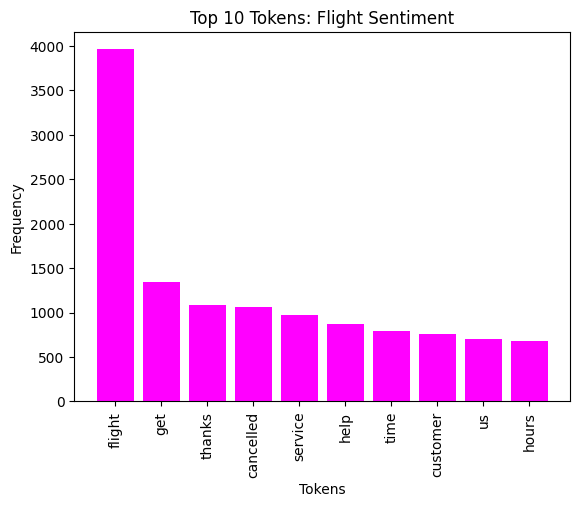

In [ ]:
# Visualize the df
plt.bar(freqdf.Tokens[:10], freqdf.Freq[:10], color = "magenta")
plt.title("Top 10 Tokens: Flight Sentiment")
plt.xlabel("Tokens")
plt.xticks(rotation = 90)
plt.ylabel("Frequency")
plt.show()

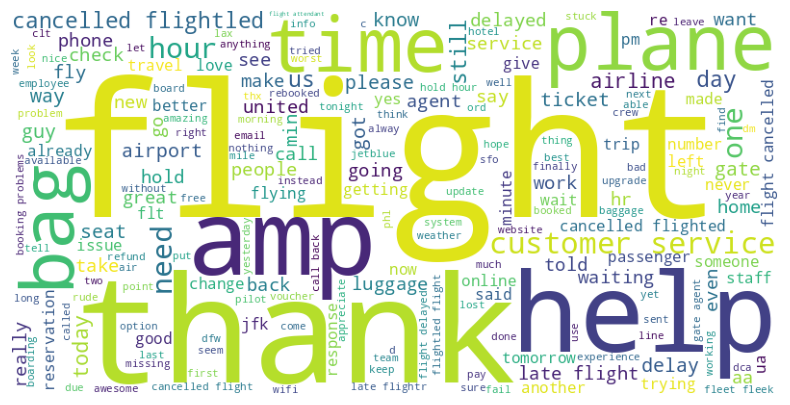

In [ ]:
# Word Cloud of the Flight Data

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 400,
                      background_color = "white").\
                      generate(" ".join(all_tokens))

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
mapped = {'neutral':0 ,'positive':1, 'negative':2}
mydf["Target"]=  mydf.airline_sentiment.map(mapped)

In [ ]:
mydf.head()

,airline_sentiment,text,clean_text,noise,Cleansed,Target
0,neutral,@VirginAmerica What @dhepburn said.,@virginamerica @dhepburn said.,"[@virginamerica, @dhepburn, .]",said,0
1,positive,@VirginAmerica plus you've added commercials t...,@virginamerica plus added commercials experien...,"[@virginamerica, ., ., ., .]",plus added commercials experience tacky,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@virginamerica today... must mean need take an...,"[@virginamerica, ., ., ., !]",today must mean need take another trip,0
3,negative,@VirginAmerica it's really aggressive to blast...,@virginamerica really aggressive blast obnoxio...,"[@virginamerica, "", "", ', &, ;]",really aggressive blast obnoxious entertainmen...,2
4,negative,@VirginAmerica and it's a really big bad thing...,@virginamerica really big bad thing,[@virginamerica],really big bad thing,2


In [ ]:
!pip install transformer torch

ERROR: Could not find a version that satisfies the requirement transformer (from versions: none)
ERROR: No matching distribution found for transformer


In [ ]:
import torch

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline


# Load pre-trained BERT model and tokenizer for sentiment analysis
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)

# Sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

## BERT Model for Prediction

In [ ]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.5 MB/s eta 0:00:00
   ━━━━

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X = mydf['Cleansed']
y = mydf['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Prepare data as DataFrames (adjust your X_train, Y_train, X_test, Y_test accordingly)
train_data = pd.DataFrame({
    'text': X_train,
    'labels': y_train
})

test_data = pd.DataFrame({
    'text': X_test,
    'labels': y_test
})

In [ ]:
# Define a BERT model using simpletransformers
from simpletransformers.classification import ClassificationModel
# Initialize the BERT model with 3 output labels
model = ClassificationModel('bert', 'bert-base-uncased',
                            num_labels=3, use_cuda=True)

# Train the model on your data
model.train_model(train_data)

TypeError: BertForSequenceClassification.__init__() got an unexpected keyword argument 'overwrite_output_dir'

In [ ]:
# Define a BERT model using simpletransformers
from simpletransformers.classification import ClassificationModel
model = ClassificationModel('bert', 'bert-large-uncased',
                            num_labels=3, use_cuda=True,
                            args={'overwrite_output_dir': True})  # For binary classification (use_cuda=True if you want to use GPU)

# Train the model on your data
model.train_model(train_data)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/1464 [00:00<?, ?it/s]

(1464, 0.6333973183006537)

In [ ]:
# Make predictions on test data
predictions, raw_outputs = model.predict(test_data['text'].tolist())

# Generate classification report
print(classification_report(test_data['labels'],
                            predictions, target_names=['Neutral', 'Positive', 'Negative']))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     Neutral       0.64      0.57      0.60       580
    Positive       0.77      0.73      0.75       459
    Negative       0.87      0.90      0.89      1889

    accuracy                           0.81      2928
   macro avg       0.76      0.74      0.75      2928
weighted avg       0.81      0.81      0.81      2928



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = mydf['Cleansed']
y = mydf['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_vec, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vec)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.85      0.89      0.87      1889
           0       0.60      0.57      0.58       580
           1       0.78      0.69      0.73       459

    accuracy                           0.79      2928
   macro avg       0.74      0.72      0.73      2928
weighted avg       0.79      0.79      0.79      2928



In [ ]:
# prompt: Give me Tf-IDF Code for the same

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create a Logistic Regression model
model_tfidf = LogisticRegression()

# Train the model
model_tfidf.fit(X_train_tfidf, y_train)

# Make predictions on the testing data
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred_tfidf))

              precision    recall  f1-score   support

          -1       0.81      0.94      0.87      1889
           0       0.68      0.44      0.53       580
           1       0.83      0.62      0.71       459

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.79      0.79      0.78      2928

